# About Dataset

## Context

There is a lack of publicly available datasets on financial services, especially in the emerging domain of mobile money transactions. Financial datasets are essential for many researchers, particularly those focused on fraud detection. However, the inherently private nature of financial transactions often limits access to such datasets.

To address this, we present a synthetic dataset generated using a simulator called PaySim. PaySim leverages aggregated data from a private dataset to create a synthetic dataset that mimics typical transaction operations and injects malicious behavior. This setup allows researchers to evaluate the performance of fraud detection methods.

## Content

PaySim simulates mobile money transactions based on a sample of real transactions from one month of financial logs for a mobile money service in an African country. These original logs were provided by a multinational company that operates this financial service in over 14 countries worldwide.

This synthetic dataset is scaled down to 1/4 of the original dataset and was specifically created for Kaggle. **Note**: Transactions flagged as fraud are canceled, so for fraud detection purposes, the columns `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest` should not be used.

## Headers

Here is an example row with header explanations:

`1, PAYMENT, 1060.31, C429214117, 1089.0, 28.69, M1591654462, 0.0, 0.0, 0, 0`

- `step` - Maps a unit of time in the real world. In this case, 1 step is 1 hour. Total steps: 744 (30-day simulation).
- `type` - Types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.
- `amount` - The transaction amount in local currency.
- `nameOrig` - Customer initiating the transaction.
- `oldbalanceOrg` - Initial balance before the transaction.
- `newbalanceOrig` - New balance after the transaction.
- `nameDest` - Customer receiving the transaction.
- `oldbalanceDest` - Initial balance of the recipient before the transaction. (Note: No data is available for customers starting with "M" (Merchants).)
- `newbalanceDest` - New balance of the recipient after the transaction. (Note: No data is available for customers starting with "M" (Merchants).)
- `isFraud` - Transactions made by fraudulent agents. In this dataset, fraudulent agents attempt to profit by gaining control of customer accounts and emptying funds via transfers and cash-out actions.
- `isFlaggedFraud` - The system flags large, potentially illegal transfers. In this dataset, an attempt to transfer more than 200,000 in a single transaction is flagged.

Here's a breakdown of the columns in the PaySim dataset:

1. **`step`**  
   - Represents time steps in the simulation. Each step equates to one hour, with a total of 744 steps simulating 30 days.

2. **`type`**  
   - Indicates the type of transaction. There are five types:
     - **CASH-IN**: Money deposited into an account.
     - **CASH-OUT**: Money withdrawn from an account.
     - **DEBIT**: Direct deduction from an account.
     - **PAYMENT**: Payment made from one account to another.
     - **TRANSFER**: Money transferred between accounts.

3. **`amount`**  
   - The transaction amount in the local currency.

4. **`nameOrig`**  
   - The identifier of the customer who initiated the transaction.

5. **`oldbalanceOrg`**  
   - The account balance of the initiating customer before the transaction.

6. **`newbalanceOrig`**  
   - The account balance of the initiating customer after the transaction.

7. **`nameDest`**  
   - The identifier of the recipient of the transaction. Customer identifiers that start with "M" represent merchants, while others are individual customers.

8. **`oldbalanceDest`**  
   - The balance of the recipient’s account before the transaction. For merchants (customers starting with "M"), this balance information is not provided.

9. **`newbalanceDest`**  
   - The balance of the recipient’s account after the transaction. Like `oldbalanceDest`, this is not provided for merchants.

10. **`isFraud`**  
    - This is a binary indicator where:
      - **1** means the transaction is fraudulent.
      - **0** means it is a legitimate transaction.
    - Fraudulent transactions are usually transfers or cash-outs, where fraud agents attempt to empty funds by moving money to a controlled account and withdrawing it.

11. **`isFlaggedFraud`**  
    - Indicates transactions flagged by the system as potential fraud based on certain business rules.
    - Here, transactions involving transfers over 200,000 in a single instance are flagged as fraud, marked as **1**; all other transactions are marked as **0**.

## Past Research

Five similar files contain runs of five different scenarios, which are further explained in Chapter 7 of my PhD thesis. (Thesis available here: [PhD Thesis](http://urn.kb.se/resolve?urn=urn:nbn:se:bth-12932)).

Each run used random seeds for 744 steps, representing one month in real time, mirroring the original logs. Each run took approximately 45 minutes on an Intel i7 processor with 16GB of RAM. The final result contains approximately 24 million financial records divided into five transaction types: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

## Acknowledgements

This dataset is part of the research project "Scalable resource-efficient systems for big data analytics," funded by the Knowledge Foundation in Sweden (grant: 20140032).

Please cite this dataset using the following reference:

**PaySim** first paper on the simulator:

E. A. Lopez-Rojas, A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection." *The 28th European Modeling and Simulation Symposium-EMSS*, Larnaca, Cyprus, 2016.


# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
data = pd.read_csv('PS_log.csv')

In [3]:
def read_csv_to_df_low_memory(file_path, chunksize=10000):
    """Load into Memory"""
    chunks = []
    
    # Read the CSV in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        # Process the chunk if needed (e.g., data cleaning, transformation)
        # For example:
        # chunk['new_column'] = chunk['existing_column'].apply(some_function)
        
        # Append the chunk to our list
        chunks.append(chunk)
    
    # Concatenate all chunks into a single DataFrame
    return pd.concat(chunks, ignore_index=True)

# Usage
file_path = 'PS_log.csv'
df = read_csv_to_df_low_memory(file_path)

# Now you can work with the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


## Validate few lines of dataset

In [3]:
data.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


In [4]:
data.tail().T

,6362615,6362616,6362617,6362618,6362619
step,743,743,743,743,743
type,CASH_OUT,TRANSFER,CASH_OUT,TRANSFER,CASH_OUT
amount,339682.13,6311409.28,6311409.28,850002.52,850002.52
nameOrig,C786484425,C1529008245,C1162922333,C1685995037,C1280323807
oldbalanceOrg,339682.13,6311409.28,6311409.28,850002.52,850002.52
newbalanceOrig,0.0,0.0,0.0,0.0,0.0
nameDest,C776919290,C1881841831,C1365125890,C2080388513,C873221189
oldbalanceDest,0.0,0.0,68488.84,0.0,6510099.11
newbalanceDest,339682.13,0.0,6379898.11,0.0,7360101.63
isFraud,1,1,1,1,1


## Check the Shape of Data
 - Rows
 - Columns

In [5]:
data.shape

(6362620, 11)

In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=6362620, step=1)

## Check dataset Structure
- verify columns format
- check for non-null values
- memory usage


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Check Descriptive Stats
- mean
- Standard Deviation
- min, max
- Quartiles 25%, 50%, 75%

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


## Treat missing Values
- Check missing Values
- Ways to treat
    - drop Columns/rows
    - filling with Constant, Mean, Mode, as Previous/next row
    - Predicting

In [10]:
# check
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# no Missing values

##  Treat Outliers
- Detect Outliers
    - Box Plot
    - Violin Plot
    - IQR
- Ways to handle
    - Droping outliers
    - Imputation - **Median**
    - Quantile based flooring and capping
    - Transformations - Log transformation can help to reduce the effect of outliers

Here, outliers are critical because they often represent the unusual, suspicious activities we aim to detect. Here’s how to approach outliers in this context:

1. **Outliers as Potential Fraud Indicators**:
   - Outliers in transaction data (e.g., unusually high amounts, unexpected transaction frequency) are often exactly what indicates fraud. In these cases, outliers are essential features rather than noise.
   - Removing or "normalizing" these outliers could erase the very patterns that signify fraudulent behavior.

2. **Analyzing the Context**:
   - Not all outliers are fraudulent. For instance, high-value transactions may be common for certain types of customers or specific periods (like Black Friday in retail). 
   - A clear understanding of customer segmentation and typical behavior patterns can help distinguish "normal" outliers from true indicators of fraud.

3. **Feature Engineering and Scaling**:
   - For models sensitive to outliers (like K-means clustering or distance-based algorithms), it may be helpful to transform the features (e.g., using log transformations) rather than removing them.
   - Standardizing features can also prevent extreme values from dominating model behavior, especially in algorithms that assume normally distributed data.

4. **Detecting Fraud by Emphasizing Outliers**:
   - Many algorithms used for fraud detection, like Isolation Forest, One-Class SVM, or Local Outlier Factor, are specifically designed to identify anomalies. In these models, the presence of outliers is the focus, and no treatment is needed.
   
5. **When to Consider Outlier Treatment**:
   - If outliers are due to data entry errors or technical glitches (like negative transaction amounts), these should be treated or removed, as they don’t represent genuine transaction behavior.


# Feature Engineering based on Insights

## Cheking for correlations

In [11]:
num_col = data.select_dtypes(['float64', 'int64'])

In [12]:
corr = num_col.corr()

In [13]:
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

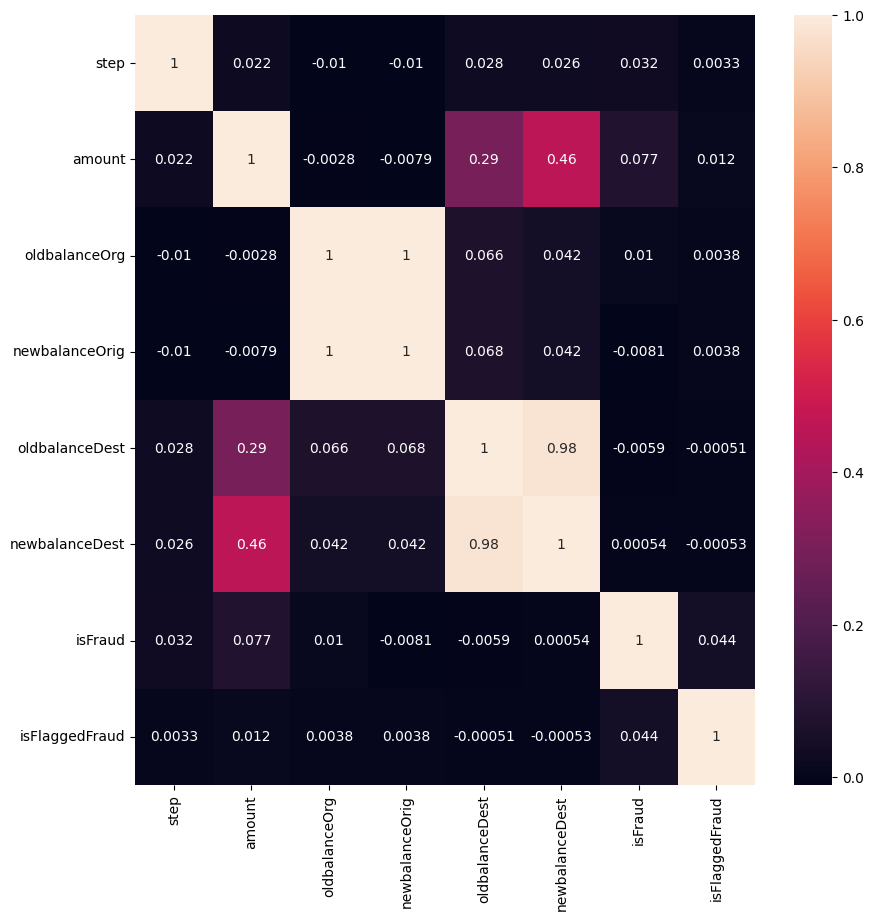

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr, annot=True)

### Insights Based on the Correlation Matrix

1. **`amount` and `newbalanceDest`**:
   - There is a moderate positive correlation of **0.459** between `amount` and `newbalanceDest`. This suggests that larger transaction amounts are somewhat associated with higher resulting balances in the recipient accounts.

2. **`oldbalanceDest` and `newbalanceDest`**:
   - A very high correlation (**0.976**) exists between `oldbalanceDest` and `newbalanceDest`, implying that these features capture nearly identical information about the destination account’s balance. This could lead to redundancy, and one of these features might be simplified or removed depending on the model used.

3. **`oldbalanceOrg` and `newbalanceOrig`**:
   - Similarly, `oldbalanceOrg` and `newbalanceOrig` are almost perfectly correlated (**0.999**). This indicates that, as with the destination balance features, the information is nearly identical. Combining these might simplify the dataset without losing information.

4. **`amount` and `oldbalanceDest`**:
   - There is a positive correlation (**0.294**) between `amount` and `oldbalanceDest`, indicating that higher transaction amounts are often associated with larger initial balances in the recipient account.

5. **`isFraud` Correlations**:
   - **`isFraud` and `amount`** have a low but positive correlation (**0.077**), suggesting that fraudulent transactions may involve slightly higher amounts than non-fraudulent transactions.
   - **`isFraud` and `isFlaggedFraud`** have a weak positive correlation (**0.044**), meaning transactions flagged as fraud have some association with actual fraudulent behavior, though it's not strong.

6. **Weak Correlations with `step`**:
   - The `step` variable shows very weak correlations with other features, suggesting that transaction time (hourly steps) does not strongly influence other aspects of transactions or fraud likelihood. This may indicate that time alone is not a strong predictor of fraud in this dataset.

### Actions

The matrix shows high redundancy between initial and resulting balances for both origin and destination accounts. This redundancy could be addressed by keeping only one set of balance features or by creating new features from the differences. The weak correlations between `isFraud` and most features indicate that fraud may not be directly tied to simple correlations in transaction amounts or balances, suggesting a more complex pattern that might be better captured by non-linear models.

In [15]:
# Create new features to capture balance changes
data['balanceChangeOrig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balanceChangeDest'] = data['newbalanceDest'] - data['oldbalanceDest']

# Feature Engineering - Transaction patterns :: Calculating the amount-to-balance ratio for origin and destination accounts
epsilon = 1e-9
data['amountToOldBalanceOrigRatio'] = data['amount'] / (data['oldbalanceOrg'] + epsilon)
data['amountToOldBalanceDestRatio'] = data['amount'] / (data['oldbalanceDest'] + epsilon)

# Drop redundant balance columns :: Since `oldbalanceOrg` and `newbalanceOrig` are highly correlated, and similarly for `oldbalanceDest` and `newbalanceDest`, dropping them.
data = data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

# Transaction frequency :: Count transactions per customer within the dataset (assuming `nameOrig` as customer ID).
data['transactionCountOrig'] = data.groupby('nameOrig')['nameOrig'].transform('count')
data['transactionCountDest'] = data.groupby('nameDest')['nameDest'].transform('count')


In [16]:

data.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
isFraud,0,0,1,1,0
isFlaggedFraud,0,0,0,0,0
balanceChangeOrig,-9839.64,-1864.28,-181.0,-181.0,-11668.14
balanceChangeDest,0.0,0.0,0.0,-21182.0,0.0
amountToOldBalanceOrigRatio,0.057834,0.087735,1.0,1.0,0.280795


## Class Imbalance Check

In [17]:

class_counts = data['isFraud'].value_counts()
print(class_counts)

class_percentage = data['isFraud'].value_counts(normalize=True) * 100
print(class_percentage)


isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


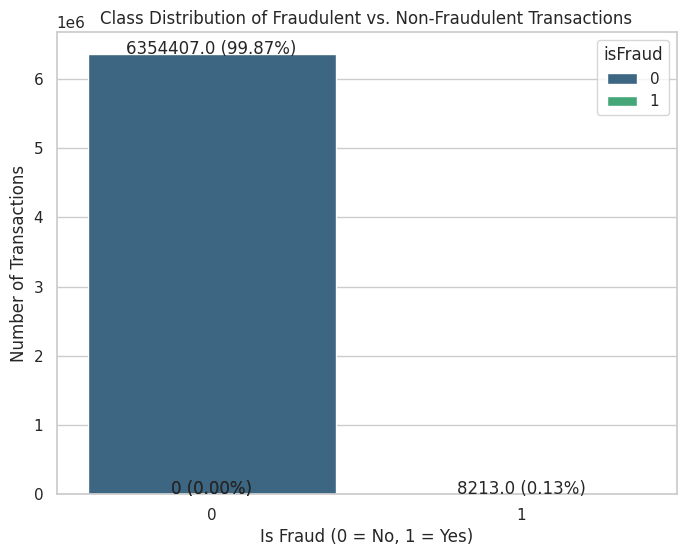

In [18]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(x='isFraud', data=data, palette='viridis', hue='isFraud')
plt.title("Class Distribution of Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Number of Transactions")

for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, 
                   p.get_height() + 200, 
                   f'{p.get_height()} ({p.get_height() * 100 / len(data):.2f}%)', 
                   ha='center')

plt.show()

Based on the class distribution you provided, where approximately 99.87% of transactions are legitimate (`isFraud = 0`) and only about 0.13% are fraudulent (`isFraud = 1`), here are some insights and actionable steps:

### Insights

1. **Severe Class Imbalance**:
   - The dataset has a significant class imbalance, indicating that the majority of transactions are legitimate. This can lead to models that favor predicting the majority class, resulting in high accuracy but poor detection of fraud.

2. **Risk of Model Bias**:
   - Standard classification models might be biased towards predicting non-fraudulent transactions. This could result in a high number of false negatives, meaning many fraudulent transactions could go undetected.

3. **Importance of Precision and Recall**:
   - Given the nature of fraud detection, it's crucial to prioritize precision (minimizing false positives) and recall (minimizing false negatives) over overall accuracy. Detecting even a small percentage of frauds correctly is critical for financial integrity.

### Actionable Steps

1. **Resampling Techniques**:
   - **Implement SMOTEENN**: Use a method like SMOTEENN, which combines SMOTE and Edited Nearest Neighbors to both oversample the minority class and clean the majority class.

2. **Adjust Model Evaluation Metrics**:
   - Use evaluation metrics that reflect the imbalanced nature of your dataset:
     - **F1 Score**: Aim to optimize the F1 score, which balances precision and recall.
     - **ROC-AUC Score**: Monitor the Area Under the Receiver Operating Characteristic curve to assess model performance across different thresholds.

3. **Employ Class Weights**:
   - In algorithms that allow it (e.g., Logistic Regression, Random Forest), set the `class_weight` parameter to `balanced` to ensure that the model places more emphasis on correctly predicting fraudulent transactions.

4. **Explore Anomaly Detection Techniques**:
   - Given the rarity of fraud cases, consider using anomaly detection methods that do not rely on labeled data:
     - **Isolation Forests** or **One-Class SVM** can be effective for identifying outlier transactions that may represent fraud.

5. **Ensemble Learning**:
   - Utilize ensemble methods like Random Forest or Gradient Boosting with appropriate modifications (e.g., class weights or custom sampling methods) to improve detection rates for the minority class.


In [19]:
fraud_rows = data[data['isFraud'] == 1]
num_fraud_rows = len(fraud_rows)
num_non_fraud_rows_to_sample = int(num_fraud_rows * 99.87)
non_fraud_rows = data[data['isFraud'] == 0].sample(n=num_non_fraud_rows_to_sample, random_state=42)
sample_data = pd.concat([fraud_rows, non_fraud_rows], ignore_index=True)

print("Sampled dataset shape:", sample_data['isFraud'].value_counts())

Sampled dataset shape: isFraud
0    820232
1      8213
Name: count, dtype: int64


In [20]:
del data

In [21]:
sample_data = sample_data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
sample_data = pd.get_dummies(sample_data, columns=['type'], drop_first=True)

In [22]:
sample_data.head().T

,0,1,2,3,4
step,1,1,1,1,1
amount,181.0,181.0,2806.0,2806.0,20128.0
isFraud,1,1,1,1,1
balanceChangeOrig,-181.0,-181.0,-2806.0,-2806.0,-20128.0
balanceChangeDest,0.0,-21182.0,0.0,-26202.0,0.0
amountToOldBalanceOrigRatio,1.0,1.0,1.0,1.0,1.0
amountToOldBalanceDestRatio,181000000000.0,0.008545,2806000000000.0,0.107091,20128000000000.0
transactionCountOrig,1,1,1,1,1
transactionCountDest,44,41,30,35,34
type_CASH_OUT,False,True,False,True,False


In [23]:
from imblearn.combine import SMOTEENN

X = sample_data.drop('isFraud', axis=1) 
y = sample_data['isFraud']                

# Print original sample_dataset shape
print("Original sample_dataset shape:", y.value_counts())

Original sample_dataset shape: isFraud
0    820232
1      8213
Name: count, dtype: int64


In [24]:
# Apply SMOTEENN 
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("Resampled dataset shape:", y_resampled.value_counts())

Resampled dataset shape: isFraud
0    683372
1    673145
Name: count, dtype: int64


In [25]:
X_resampled.columns

Index(['step', 'amount', 'balanceChangeOrig', 'balanceChangeDest',
       'amountToOldBalanceOrigRatio', 'amountToOldBalanceDestRatio',
       'transactionCountOrig', 'transactionCountDest', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

# Model Experimentation

In [26]:
import pandas as pd
import mlflow
import mlflow.xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, roc_auc_score, roc_curve)
from mlflow.models import infer_signature

In [27]:
mlflow.create_experiment("Mobile Payment Fraud Detection")

'246510150083088185'

## XGBoost

In [31]:

def test_xgboost(X, y, experiment_name="Mobile Payment Fraud Detection"):
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run() as run:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        best_cv_score = cv_scores.mean()
        mlflow.log_metric("best_cv_score", best_cv_score)

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        mlflow.log_param("model_type", "XGBoost")
        mlflow.log_param("test_size", 0.3)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc", roc_auc)
        
        report = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        signature = infer_signature(X, y_pred)
        mlflow.xgboost.log_model(model, "model", signature=signature)
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Fraud', 'Fraud'], 
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()
        
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        mlflow.log_artifact("roc_curve.png")
        plt.close()

        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", cm)

In [32]:
test_xgboost(X=X_resampled, y=y_resampled)

/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:03:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/xg

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    204867
           1       1.00      1.00      1.00    202089

    accuracy                           1.00    406956
   macro avg       1.00      1.00      1.00    406956
weighted avg       1.00      1.00      1.00    406956

Confusion Matrix:
 [[204580    287]
 [    16 202073]]


## LightGBM

In [35]:
import mlflow.lightgbm
import lightgbm as lgb


def test_lightgbm(X, y, experiment_name="Mobile Payment Fraud Detection"):
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run() as run:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = lgb.LGBMClassifier()

        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        best_cv_score = cv_scores.mean()
        mlflow.log_metric("best_cv_score", best_cv_score)

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        mlflow.log_param("model_type", "LightGBM")
        mlflow.log_param("test_size", 0.3)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc", roc_auc)
        
        report = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        signature = infer_signature(X, y_pred)
        mlflow.lightgbm.log_model(model, "model", signature=signature)
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Fraud', 'Fraud'], 
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()
        
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        mlflow.log_artifact("roc_curve.png")
        plt.close()

        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", cm)


In [36]:
test_lightgbm(X=X_resampled, y=y_resampled)

[LightGBM] [Info] Number of positive: 376844, number of negative: 382804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1632
[LightGBM] [Info] Number of data points in the train set: 759648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496077 -> initscore=-0.015692
[LightGBM] [Info] Start training from score -0.015692
[LightGBM] [Info] Number of positive: 376845, number of negative: 382804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1634
[LightGBM] [Info] Number of data points in the train set: 759649, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496078 -> initscore=-0.015

/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    204867
           1       1.00      1.00      1.00    202089

    accuracy                           1.00    406956
   macro avg       1.00      1.00      1.00    406956
weighted avg       1.00      1.00      1.00    406956

Confusion Matrix:
 [[204862      5]
 [    17 202072]]


## CatBoost

In [41]:
import mlflow.catboost
from catboost import CatBoostClassifier


def test_catboost(X, y, experiment_name="Mobile Payment Fraud Detection"):
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run() as run:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = CatBoostClassifier()

        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
        best_cv_score = cv_scores.mean()
        mlflow.log_metric("best_cv_score", best_cv_score)

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        mlflow.log_param("model_type", "CatBoost")
        mlflow.log_param("test_size", 0.3)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc", roc_auc)
        
        report = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        signature = infer_signature(X, y_pred)
        mlflow.catboost.log_model(model, "model", signature=signature)
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Fraud', 'Fraud'], 
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()
        
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        mlflow.log_artifact("roc_curve.png")
        plt.close()

        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", cm)


In [42]:
test_catboost(X=X_resampled, y=y_resampled)

Learning rate set to 0.174967
0:	learn: 0.2268301	total: 86ms	remaining: 1m 25s
1:	learn: 0.0740154	total: 177ms	remaining: 1m 28s
2:	learn: 0.0255870	total: 287ms	remaining: 1m 35s
3:	learn: 0.0127590	total: 379ms	remaining: 1m 34s
4:	learn: 0.0079969	total: 477ms	remaining: 1m 34s
5:	learn: 0.0059122	total: 619ms	remaining: 1m 42s
6:	learn: 0.0044028	total: 792ms	remaining: 1m 52s
7:	learn: 0.0036409	total: 922ms	remaining: 1m 54s
8:	learn: 0.0032653	total: 1.05s	remaining: 1m 55s
9:	learn: 0.0027264	total: 1.2s	remaining: 1m 58s
10:	learn: 0.0024606	total: 1.33s	remaining: 1m 59s
11:	learn: 0.0021545	total: 1.43s	remaining: 1m 57s
12:	learn: 0.0019710	total: 1.53s	remaining: 1m 56s
13:	learn: 0.0018178	total: 1.62s	remaining: 1m 54s
14:	learn: 0.0017096	total: 1.71s	remaining: 1m 52s
15:	learn: 0.0016400	total: 1.79s	remaining: 1m 49s
16:	learn: 0.0015395	total: 1.87s	remaining: 1m 48s
17:	learn: 0.0014181	total: 1.96s	remaining: 1m 47s
18:	learn: 0.0013433	total: 2.05s	remaining: 1

/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    204867
           1       1.00      1.00      1.00    202089

    accuracy                           1.00    406956
   macro avg       1.00      1.00      1.00    406956
weighted avg       1.00      1.00      1.00    406956

Confusion Matrix:
 [[204859      8]
 [    35 202054]]


## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest


def test_isolation_forest(X, y, experiment_name="Anomaly Detection"):
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run() as run:
        model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
        model.fit(X)

        # Isolation Forest predicts -1 for anomalies and 1 for normal points
        y_pred = model.predict(X)
        y_pred = [1 if pred == -1 else 0 for pred in y_pred]  # 1: Fraud, 0: Non-Fraud

        accuracy = accuracy_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred)
        
        mlflow.log_param("model_type", "Isolation Forest")
        mlflow.log_param("contamination", 0.001)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc", roc_auc)

        report = classification_report(y, y_pred, output_dict=True)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        signature = infer_signature(X, y_pred)
        mlflow.sklearn.log_model(model, "model", signature=signature)
        
        cm = confusion_matrix(y, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Fraud', 'Fraud'], 
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()
        
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        mlflow.log_artifact("roc_curve.png")
        plt.close()

        print("Classification Report:\n", classification_report(y, y_pred))
        print("Confusion Matrix:\n", cm)



In [46]:
test_isolation_forest(X=X, y=y)

2024/11/03 15:38:15 INFO mlflow.tracking.fluent: Experiment with name 'Isolation Forest Experiment' does not exist. Creating a new experiment.
/home/happy/spaces/envs/fraudenv/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    820232
           1       0.76      0.08      0.14      8213

    accuracy                           0.99    828445
   macro avg       0.87      0.54      0.57    828445
weighted avg       0.99      0.99      0.99    828445

Confusion Matrix:
 [[820032    200]
 [  7584    629]]


## OneClass SVM

In [ ]:
from sklearn.svm import OneClassSVM


def test_oneclass_svm(X, y, experiment_name="Anomaly Detection"):
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run() as run:
        model = OneClassSVM(kernel="rbf", gamma="auto", nu=0.001)
        model.fit(X)

        y_pred = model.predict(X)
        y_pred = [1 if pred == -1 else 0 for pred in y_pred]  # 1: Fraud, 0: Non-Fraud

        accuracy = accuracy_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred)
        
        mlflow.log_param("model_type", "OneClass SVM")
        mlflow.log_param("nu", 0.001)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("roc_auc", roc_auc)

        report = classification_report(y, y_pred, output_dict=True)
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        signature = infer_signature(X, y_pred)
        mlflow.sklearn.log_model(model, "model", signature=signature)
        
        cm = confusion_matrix(y, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Non-Fraud', 'Fraud'], 
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()
        
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        mlflow.log_artifact("roc_curve.png")
        plt.close()

        print("Classification Report:\n", classification_report(y, y_pred))
        print("Confusion Matrix:\n", cm)

test_oneclass_svm(X, y)
